# Project 1, Part 5, Data Visualization



# Included Modules and Packages

Code cell containing your includes for modules and packages

In [1]:
import math
import numpy as np
import pandas as pd

import psycopg2

# Supporting code

Code cells containing any supporting code, such as connecting to the database, any functions, etc.  Remember you can use any code from the labs.

In [2]:
#
# function to run a select query and return rows in a pandas dataframe
# pandas puts all numeric values from postgres to float
# if it will fit in an integer, change it to integer
#

def my_select_query_pandas(query, rollback_before_flag, rollback_after_flag):
    "function to run a select query and return rows in a pandas dataframe"
    
    if rollback_before_flag:
        connection.rollback()
    
    df = pd.read_sql_query(query, connection)
    
    if rollback_after_flag:
        connection.rollback()
    
    # fix the float columns that really should be integers
    
    for column in df:
    
        if df[column].dtype == "float64":

            fraction_flag = False

            for value in df[column].values:
                
                if not np.isnan(value):
                    if value - math.floor(value) != 0:
                        fraction_flag = True

            if not fraction_flag:
                df[column] = df[column].astype('Int64')
    
    return(df)
    

In [3]:
connection = psycopg2.connect(
    user = "postgres",
    password = "ucb",
    host = "postgres",
    port = "5432",
    database = "postgres"
)

# 1.5 Example of a Data Visualization created using Python

The data science team would like for you to create an example of a data visualization using Python from data in a Pandas dataframe containing data from an SQL query.

Write 1 and only 1 query.  Note that the query may have as many subqueries, including "with" clauses, as you wish.  Any query of your choosing.  You can write a query from scratch.  You can use a query from a previous problem in this project.  You can use a query from the labs.  The idea is to come up with a query whose resulting data will make for an excellent quality data visualization. 

Ensure that when you check this Juptyer Notebook into GitHub that the query results in the Pandas dataframe are clearly visible in GitHub.  Note: When a query result has a large number of rows, Pandas will only display the first 5 rows, a row with ellipses, and the last 5 rows. This is ok.

Once you have the data in a Pandas dataframe, you may write as much Python code and use as many code cells as you wish to produce the data visualization.

You may only use Python modules that are currently installed in the Anaconda Docker container.  You may not install additional modules or any other software.

All work must be done in Docker in your VM in AWS.  You may not use any external data visualization systems, such as Tableau, etc.

You may use any code from the labs to pattern your code after, however for the data visualization, you cannot wholesale copy a data visualization from the labs.

Ensure that it is properly titled, including titles for axes if present.

Ensure that when you check this Juptyer Notebook into GitHub that the data visualization is clearly visible.  

If you want to use Google Maps for your data visualization, this is fine, however, the image will not show up in GitHub.  So, just save the image to an image file, include it in the repo, and add a markdown cell to display the image file. Also with Google Maps, do NOT check gmap_api_key.txt into GitHub for security reasons.  If the grader needs to run it, they will supply their own gmap_api_key.txt.


In [7]:
rollback_before_flag = True
rollback_after_flag = True

query = """

/* Creating a temp table called 'store_sales_master' */
with store_sales_master as (
    /* Inside this temp table, selecting the required columns and calculating 
       the number of transactions, items bought, and amount spent per store */
    select 
        c.zip as customer_zip,
        zc.city as customer_city,
        zc.state as customer_state,
        s.store_id,
        st.city as store_city,
        st.state as store_state,
        count(distinct s.sale_id) as total_transactions, 
        sum(li.quantity) as total_items_bought, 
        sum(s.total_amount) as total_amount_spent,
        /* Adding the 'out_of_city' column */
        case 
            when zc.state = st.state and zc.city != st.city then 'Yes' 
            else 'No' 
        end as out_of_city,
        /* Adding the 'out_of_state' column */
        case 
            when zc.state != st.state then 'Yes' 
            else 'No' 
        end as out_of_state
    from 
        customers c
    /* Joining with 'sales' table on 'customer_id' */
    join 
        sales s on c.customer_id = s.customer_id
    /* Joining with 'line_items' table on 'sale_id' and 'store_id' */
    join 
        line_items li on s.sale_id = li.sale_id and s.store_id = li.store_id
    /* Joining with 'stores' table on 'store_id' */
    join 
        stores st on s.store_id = st.store_id
    /* Joining with 'zip_codes' table to compare customer zip with store city zip and to get the customer city and state */
    join 
        zip_codes zc on c.zip = zc.zip
    /* Grouping by 'customer_zip', 'store_id', 'store_city', 'store_state' and 'customer_city', 'customer_state' */
    group by 
        c.zip, 
        zc.city,
        zc.state,
        s.store_id, 
        st.city, 
        st.state,
        zc.zip
)

/* Now, selecting the computed metrics and the newly created columns 'out_of_city' and 'out_of_state' from 'store_sales_master' temp table */

select 
    customer_zip,
    customer_city,
    customer_state,
    store_id,
    store_city,
    store_state,
    total_transactions, 
    round(total_items_bought / total_transactions, 2) as avg_items_per_transaction, 
    round(total_amount_spent / total_transactions, 2) as avg_amount_per_transaction,
    out_of_city,
    out_of_state
from 
    store_sales_master;

"""

df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df

,customer_zip,customer_city,customer_state,store_id,store_city,store_state,total_transactions,avg_items_per_transaction,avg_amount_per_transaction,out_of_city,out_of_state
0,33004,Dania,FL,4,Miami,FL,46,5.65,303.91,Yes,No
1,33009,Hallandale,FL,4,Miami,FL,1438,6.08,328.15,Yes,No
2,33010,Hialeah,FL,4,Miami,FL,6468,5.50,287.86,Yes,No
3,33012,Hialeah,FL,4,Miami,FL,4509,5.34,278.83,Yes,No
4,33013,Hialeah,FL,4,Miami,FL,2450,5.44,285.15,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
545,98403,Tacoma,WA,2,Seattle,WA,65,5.98,328.62,Yes,No
546,98407,Tacoma,WA,2,Seattle,WA,114,6.29,341.47,Yes,No
547,98416,Tacoma,WA,2,Seattle,WA,43,6.14,333.77,Yes,No
548,98421,Tacoma,WA,2,Seattle,WA,228,6.03,325.74,Yes,No


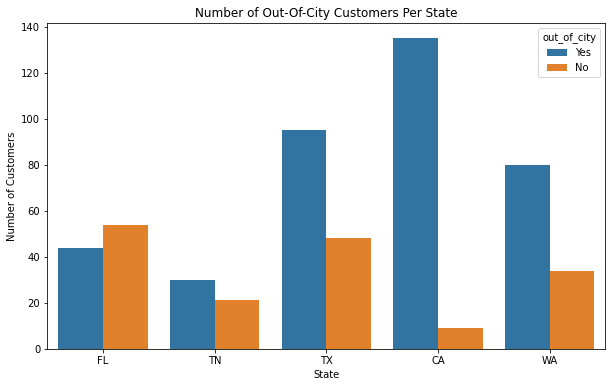

In [11]:
# Use as many code cells as you need to create and display your data visualization

# df.head(10)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='customer_state', hue='out_of_city')
plt.title('Number of Out-Of-City Customers Per State')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.show()


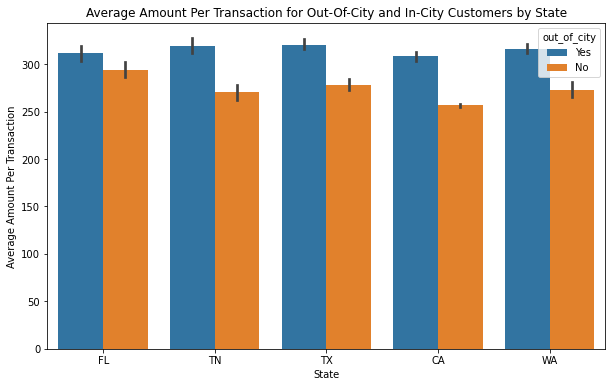

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='customer_state', y='avg_amount_per_transaction', hue='out_of_city')
plt.title('Average Amount Per Transaction for Out-Of-City and In-City Customers by State')
plt.xlabel('State')
plt.ylabel('Average Amount Per Transaction')
plt.show()


In [13]:
import geopandas as gpd
# First, you need a geoDataFrame which contains the geometry information of each state. 
# You can download this kind of data (normally .shp file) from many places, such as https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html
# We'll assume it's downloaded and loaded into a variable called "us_states"

# Then, merge our current data with the geographical data
df_geo = us_states.set_index('customer_state').join(df.set_index('state'))

# Plot the heatmap based on the number of out-of-city customers
df_geo['out_of_city'].plot(kind='heatmap', legend=True)
plt.title('Heatmap of Number of Out-Of-City Customers by State')
plt.show()


ModuleNotFoundError: No module named 'geopandas'

In [5]:
2802756+2641356+2670948+2315748+2045700+1962804+1886136+1234284+513564

18073296

In [6]:
4289388 - 18073296

-13783908